In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

from aind_hcr_data_loader.tile_data import TileData
import aind_hcr_qc.tile_alignment as ta

# notebook reload
%load_ext autoreload
%autoreload 2

## Choose bigstitcher xml

In [2]:
save_dir = Path(f'/root/capsule/scratch/dev-plots')
bucket_name = "aind-open-data"

In [3]:
xml_path = "./bigstitcher.xml"
stitched_xml = ta.parse_bigstitcher_xml(xml_path)

stitched_xml["dataset_path"] = stitched_xml["dataset_path"] + "/"

{'@setup': '62', '@timepoint': '0', 'path': 'Tile_X_0006_Y_0002_Z_0000_ch_405.zarr'}
{'@setup': '63', '@timepoint': '0', 'path': 'Tile_X_0006_Y_0003_Z_0000_ch_405.zarr'}
{'@setup': '64', '@timepoint': '0', 'path': 'Tile_X_0006_Y_0004_Z_0000_ch_405.zarr'}
{'@setup': '72', '@timepoint': '0', 'path': 'Tile_X_0007_Y_0002_Z_0000_ch_405.zarr'}
{'@setup': '73', '@timepoint': '0', 'path': 'Tile_X_0007_Y_0003_Z_0000_ch_405.zarr'}
{'@setup': '74', '@timepoint': '0', 'path': 'Tile_X_0007_Y_0004_Z_0000_ch_405.zarr'}
{'@setup': '82', '@timepoint': '0', 'path': 'Tile_X_0008_Y_0002_Z_0000_ch_405.zarr'}
{'@setup': '83', '@timepoint': '0', 'path': 'Tile_X_0008_Y_0003_Z_0000_ch_405.zarr'}
{'@setup': '84', '@timepoint': '0', 'path': 'Tile_X_0008_Y_0004_Z_0000_ch_405.zarr'}
{62: 'Tile_X_0006_Y_0002_Z_0000_ch_405.zarr', 63: 'Tile_X_0006_Y_0003_Z_0000_ch_405.zarr', 64: 'Tile_X_0006_Y_0004_Z_0000_ch_405.zarr', 72: 'Tile_X_0007_Y_0002_Z_0000_ch_405.zarr', 73: 'Tile_X_0007_Y_0003_Z_0000_ch_405.zarr', 74: 'Tile

In [4]:
stitched_xml

{'tile_names': {62: 'Tile_X_0006_Y_0002_Z_0000_ch_405.zarr',
  63: 'Tile_X_0006_Y_0003_Z_0000_ch_405.zarr',
  64: 'Tile_X_0006_Y_0004_Z_0000_ch_405.zarr',
  72: 'Tile_X_0007_Y_0002_Z_0000_ch_405.zarr',
  73: 'Tile_X_0007_Y_0003_Z_0000_ch_405.zarr',
  74: 'Tile_X_0007_Y_0004_Z_0000_ch_405.zarr',
  82: 'Tile_X_0008_Y_0002_Z_0000_ch_405.zarr',
  83: 'Tile_X_0008_Y_0003_Z_0000_ch_405.zarr',
  84: 'Tile_X_0008_Y_0004_Z_0000_ch_405.zarr'},
 'tile_transforms': {62: [{'@type': 'affine',
    'Name': 'Translation to Nominal Grid',
    'affine': '1.0 0.0 0.0 2736.0 0.0 1.0 0.0 -7296.0 0.0 0.0 1.0 0.0'}],
  63: [{'@type': 'affine',
    'Name': 'Translation to Nominal Grid',
    'affine': '1.0 0.0 0.0 2736.0 0.0 1.0 0.0 -5471.0 0.0 0.0 1.0 0.0'}],
  64: [{'@type': 'affine',
    'Name': 'Translation to Nominal Grid',
    'affine': '1.0 0.0 0.0 2736.0 0.0 1.0 0.0 -3648.0 0.0 0.0 1.0 0.0'}],
  72: [{'@type': 'affine',
    'Name': 'Translation to Nominal Grid',
    'affine': '1.0 0.0 0.0 4560.0 0.0 1.0

## Check adjacent tile pairs

In [4]:
# adjacent pairs
pairs = ta.get_all_adjacent_pairs(stitched_xml["tile_names"], 
                                  include_diagonals=False)

print(f"Found {len(pairs)} adjacent pairs")
print("First two pairs:")
pairs[0:2]

Found 12 adjacent pairs
First two pairs:


[('Tile_X_0006_Y_0002_Z_0000_ch_405.zarr',
  'Tile_X_0006_Y_0003_Z_0000_ch_405.zarr'),
 ('Tile_X_0006_Y_0002_Z_0000_ch_405.zarr',
  'Tile_X_0007_Y_0002_Z_0000_ch_405.zarr')]

## Create PairedTile instance

In [20]:
pair_n = 1
tile1_name = pairs[pair_n][0]
tile2_name = pairs[pair_n][1]
pyramid_level = 3

paired_tiles = ta.create_paired_tiles(
    data=stitched_xml,  
    tile1_name=tile1_name, 
    tile2_name=tile2_name,
    bucket_name=bucket_name,
    pyramid_level=pyramid_level
)


Loaded tile Tile_X_0006_Y_0002_Z_0000_ch_405.zarr at pyramid level 3 with shape (170, 238, 238)
Loaded tile Tile_X_0007_Y_0002_Z_0000_ch_405.zarr at pyramid level 3 with shape (170, 238, 238)
Getting net transforms for tile: Tile_X_0006_Y_0002_Z_0000_ch_405.zarr
Available tile names: ['Tile_X_0006_Y_0002_Z_0000_ch_405.zarr', 'Tile_X_0006_Y_0003_Z_0000_ch_405.zarr', 'Tile_X_0006_Y_0004_Z_0000_ch_405.zarr', 'Tile_X_0007_Y_0002_Z_0000_ch_405.zarr', 'Tile_X_0007_Y_0003_Z_0000_ch_405.zarr', 'Tile_X_0007_Y_0004_Z_0000_ch_405.zarr', 'Tile_X_0008_Y_0002_Z_0000_ch_405.zarr', 'Tile_X_0008_Y_0003_Z_0000_ch_405.zarr', 'Tile_X_0008_Y_0004_Z_0000_ch_405.zarr']
Getting net transforms for tile: Tile_X_0007_Y_0002_Z_0000_ch_405.zarr
Available tile names: ['Tile_X_0006_Y_0002_Z_0000_ch_405.zarr', 'Tile_X_0006_Y_0003_Z_0000_ch_405.zarr', 'Tile_X_0006_Y_0004_Z_0000_ch_405.zarr', 'Tile_X_0007_Y_0002_Z_0000_ch_405.zarr', 'Tile_X_0007_Y_0003_Z_0000_ch_405.zarr', 'Tile_X_0007_Y_0004_Z_0000_ch_405.zarr', 'Tile

In [21]:
paired_tiles.composite.shape

(466, 238, 170, 3)

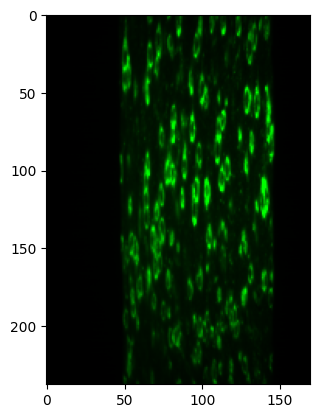

In [27]:
plt.imshow(paired_tiles.composite[238,:,:,:])

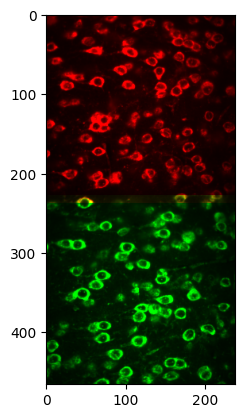

In [23]:
plt.imshow(paired_tiles.composite[:,:,100,:])

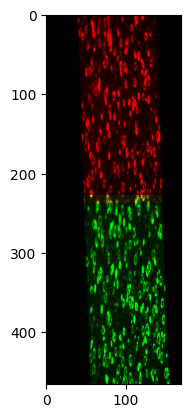

In [24]:
plt.imshow(paired_tiles.composite[:,100,:,:])

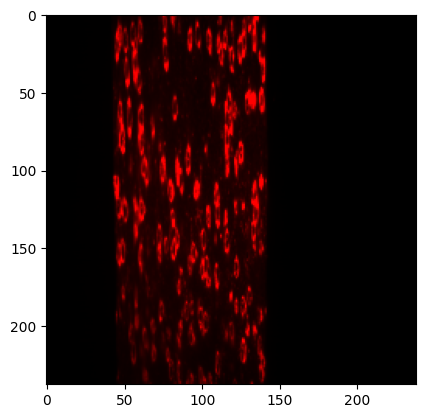

In [9]:
plt.imshow(paired_tiles.composite[100,:,:,:])

## Analyze transforms

In [22]:
stitched_xml["dataset_path"]

'HCR_788639-25_2025-06-06_13-00-00_processed_2025-06-17_07-08-14/corrected.ome.zarr'

In [ ]:
pair_n = 0
tile1_name = pairs[pair_n][0]
tile2_name = pairs[pair_n][1]
pyramid_level = 2

tile1 = TileData(tile_name=tile1_name, 
                bucket_name=bucket_name, 
                dataset_path=stitched_xml["dataset_path"],
                pyramid_level=pyramid_level)
tile2 = TileData(tile_name=tile2_name, 
                bucket_name=bucket_name, 
                dataset_path=stitched_xml["dataset_path"],
                pyramid_level=pyramid_level)
#transform1, transform2 = ta.get_transforms(tile1, tile2)

Loaded tile Tile_X_0006_Y_0002_Z_0000_ch_405.zarr at pyramid level 2 with shape (341, 477, 477)
Loaded tile Tile_X_0006_Y_0003_Z_0000_ch_405.zarr at pyramid level 2 with shape (341, 477, 477)


AttributeError: module 'aind_hcr_qc.tile_alignment' has no attribute 'get_transforms'

In [13]:
data = stitched_xml
list(data["tile_names"].values()).index(tile1_name)

data["tile_names"].keys()

dict_keys([62, 63, 64, 72, 73, 74, 82, 83, 84])

In [ ]:
list(data["tile_names"].keys())[0]

62

In [8]:
ta.get_net_transforms(stitched_xml,tile1_name)

Getting net transforms for tile: Tile_X_0006_Y_0002_Z_0000_ch_405.zarr
Available tile names: ['Tile_X_0006_Y_0002_Z_0000_ch_405.zarr', 'Tile_X_0006_Y_0003_Z_0000_ch_405.zarr', 'Tile_X_0006_Y_0004_Z_0000_ch_405.zarr', 'Tile_X_0007_Y_0002_Z_0000_ch_405.zarr', 'Tile_X_0007_Y_0003_Z_0000_ch_405.zarr', 'Tile_X_0007_Y_0004_Z_0000_ch_405.zarr', 'Tile_X_0008_Y_0002_Z_0000_ch_405.zarr', 'Tile_X_0008_Y_0003_Z_0000_ch_405.zarr', 'Tile_X_0008_Y_0004_Z_0000_ch_405.zarr']


array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]])

In [17]:
# check transpose
tile1 = TileData(tile_name=tile2_name, 
                bucket_name=bucket_name, 
                dataset_path=stitched_xml["dataset_path"],
                pyramid_level=pyramid_level, verbose=True).transpose((2,1,0))

Loaded tile Tile_X_0007_Y_0002_Z_0000_ch_405.zarr at pyramid level 3 with shape (170, 238, 238)
Transposed data to shape (238, 238, 170) with dimension order XYZ


In [18]:
tile1.shape

(238, 238, 170)

In [19]:
tile1.data

array([[[89, 89, 89, ..., 89, 90, 89],
        [89, 89, 90, ..., 89, 89, 89],
        [91, 91, 91, ..., 91, 91, 91],
        ...,
        [89, 90, 89, ..., 90, 89, 89],
        [90, 90, 90, ..., 90, 90, 90],
        [90, 90, 90, ..., 90, 90, 90]],

       [[89, 90, 90, ..., 90, 90, 90],
        [90, 89, 90, ..., 90, 90, 89],
        [90, 90, 90, ..., 91, 90, 91],
        ...,
        [90, 90, 90, ..., 90, 89, 90],
        [89, 89, 89, ..., 89, 90, 90],
        [90, 90, 90, ..., 90, 90, 90]],

       [[90, 90, 90, ..., 90, 90, 90],
        [90, 90, 90, ..., 90, 90, 90],
        [90, 90, 90, ..., 90, 90, 90],
        ...,
        [90, 89, 90, ..., 90, 90, 90],
        [90, 90, 90, ..., 90, 90, 90],
        [90, 90, 90, ..., 90, 90, 90]],

       ...,

       [[89, 90, 90, ..., 90, 90, 90],
        [91, 91, 90, ..., 90, 90, 91],
        [90, 90, 90, ..., 90, 91, 90],
        ...,
        [91, 90, 91, ..., 91, 91, 91],
        [91, 91, 90, ..., 91, 91, 91],
        [91, 91, 91, ..., 90, 91

In [31]:
tile1_t = tile1.transpose((2,1,0))

In [32]:
print(tile1_t.shape)
tile1_t.data

(238, 238, 170)


array([[[89, 89, 89, ..., 89, 90, 89],
        [89, 89, 90, ..., 89, 89, 89],
        [91, 91, 91, ..., 91, 91, 91],
        ...,
        [89, 90, 89, ..., 90, 89, 89],
        [90, 90, 90, ..., 90, 90, 90],
        [90, 90, 90, ..., 90, 90, 90]],

       [[89, 90, 90, ..., 90, 90, 90],
        [90, 89, 90, ..., 90, 90, 89],
        [90, 90, 90, ..., 91, 90, 91],
        ...,
        [90, 90, 90, ..., 90, 89, 90],
        [89, 89, 89, ..., 89, 90, 90],
        [90, 90, 90, ..., 90, 90, 90]],

       [[90, 90, 90, ..., 90, 90, 90],
        [90, 90, 90, ..., 90, 90, 90],
        [90, 90, 90, ..., 90, 90, 90],
        ...,
        [90, 89, 90, ..., 90, 90, 90],
        [90, 90, 90, ..., 90, 90, 90],
        [90, 90, 90, ..., 90, 90, 90]],

       ...,

       [[89, 90, 90, ..., 90, 90, 90],
        [91, 91, 90, ..., 90, 90, 91],
        [90, 90, 90, ..., 90, 91, 90],
        ...,
        [91, 90, 91, ..., 91, 91, 91],
        [91, 91, 90, ..., 91, 91, 91],
        [91, 91, 91, ..., 90, 91